# Stroke Prediction Using Machine Learning

### Group members: Vaibhav Gaikwad, Sukhad Joshi, Biswadip Bhattachharyya 

This project aims to predict the likelihood of stroke based on patient data. We explore healthcare-related features and apply machine learning models to assess stroke risk. The notebook follows a structured pipeline: EDA → Preprocessing → Modeling → Evaluation → Insights.

In [26]:
# Importing Libraries 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 
from imblearn.over_sampling import SMOTE


In [27]:
%pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [28]:
# Reading the Dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(10)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


## 1. Load Dataset
Load the stroke dataset and display basic info.

### EDA 

In [29]:
# Checking for NaN
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [30]:
# Replacing NaN values with column mean
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [31]:
df.isna().sum() 

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## 2. Exploratory Data Analysis (EDA)
Check for missing values, visualize distributions of numeric and categorical features.

In [32]:
# CHecking for Null Values
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

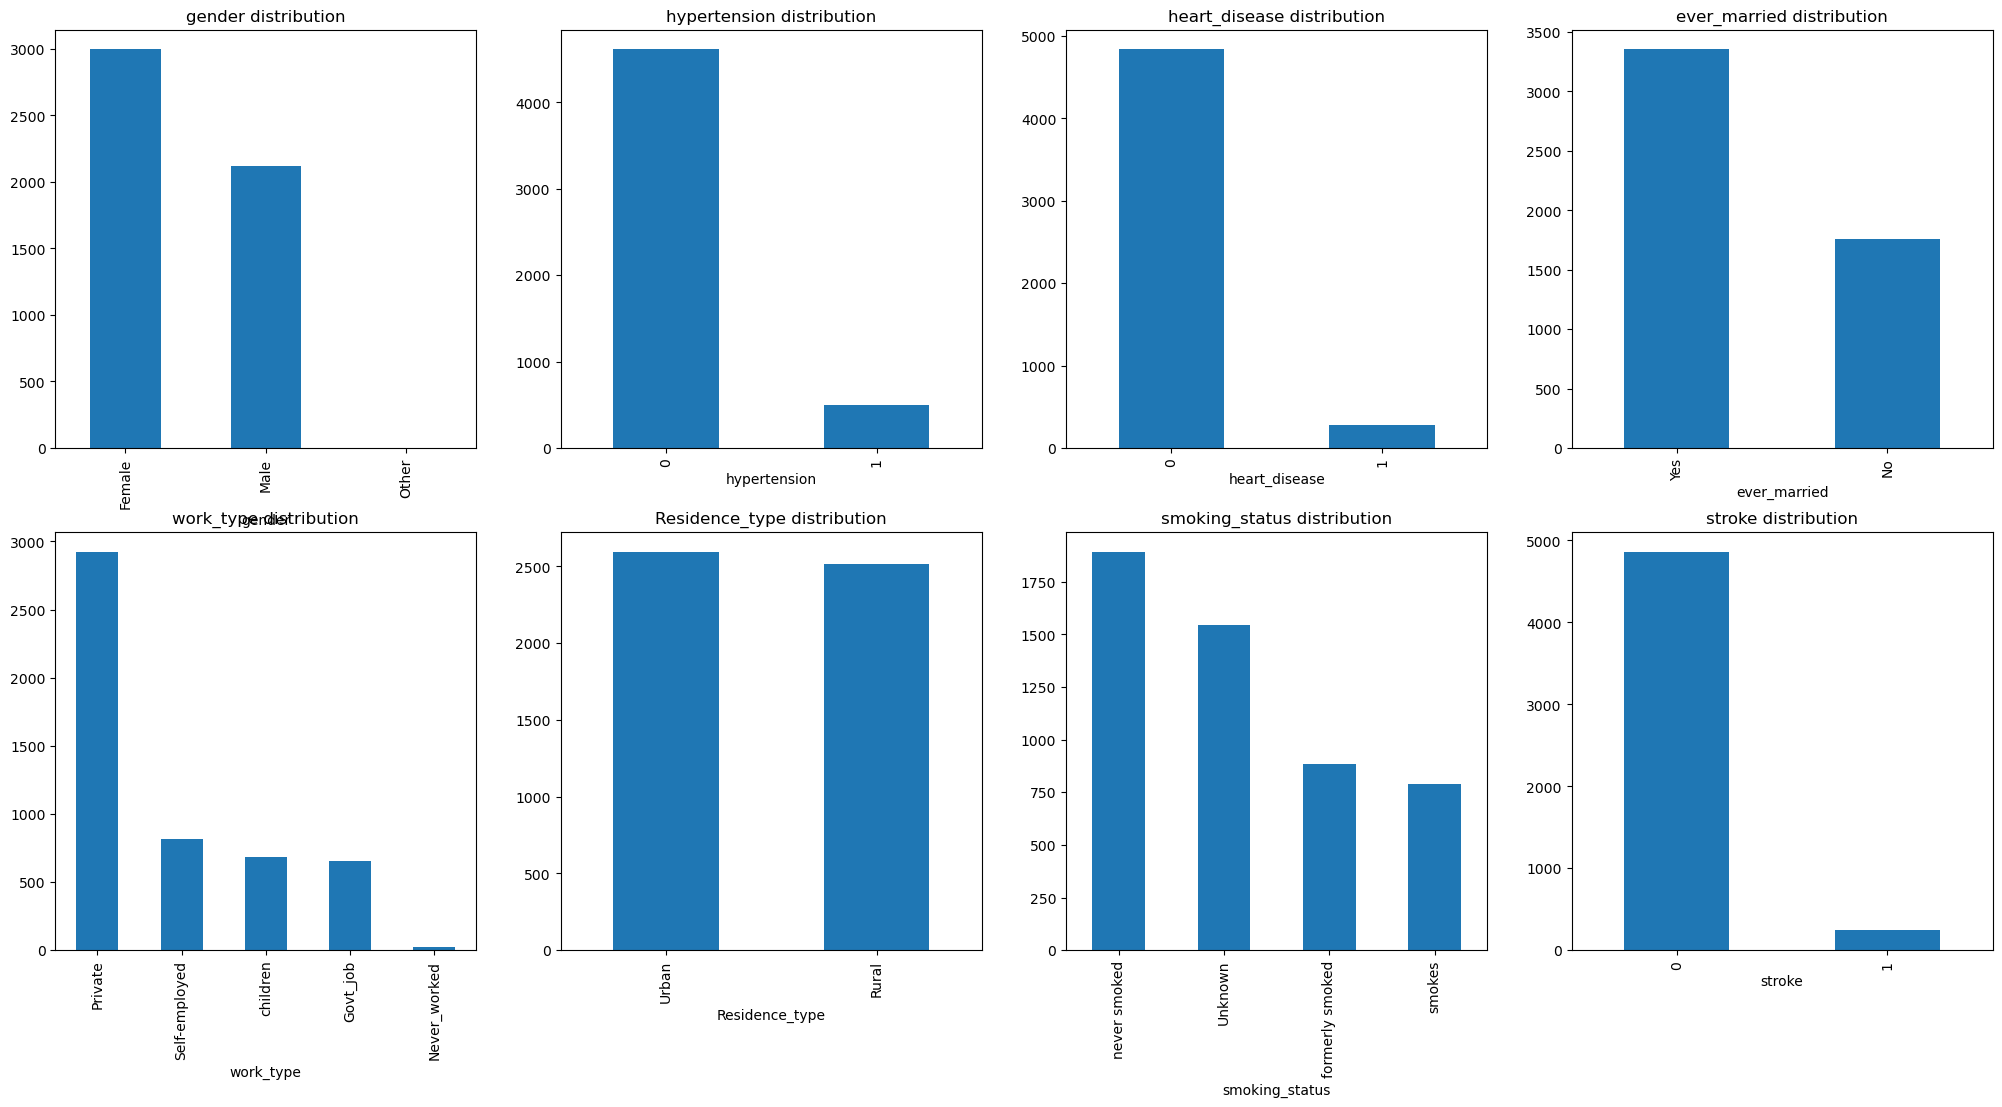

In [33]:
# Plotting Categorical Columns
categorical_columns = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']
j = 1
plt.figure(figsize=(25,25))
for i in categorical_columns:
 plt.subplot(4,4,j)
 df[i].value_counts().plot(kind='bar')
 plt.title('%s distribution' %i)

 j += 1


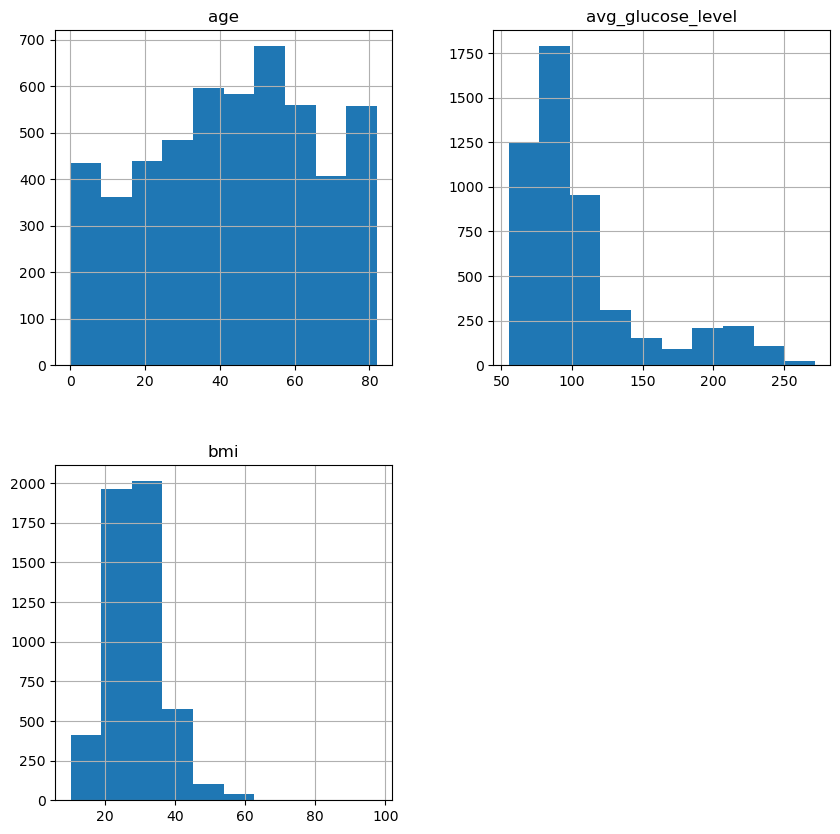

In [34]:
# Plotting Numeric Columns
numeric_col = ['age','avg_glucose_level','bmi']
df[numeric_col].hist(figsize=(10,10))
plt.show()

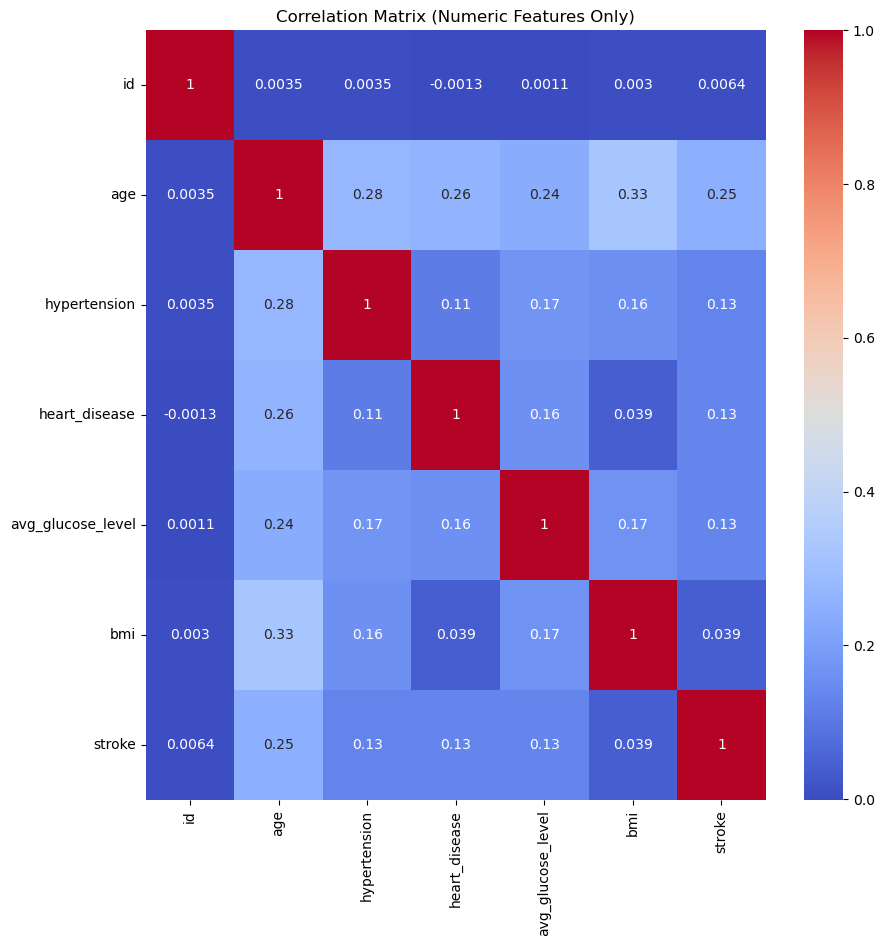

In [35]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


## 3. Data Cleaning and Preprocessing
- Handle missing values (BMI)
- Encode categorical variables
- Scale numerical features

*From the correlation matrix, we dont see any strong correlation between predictor variables. To reiterate this, lets plot a pairplot*

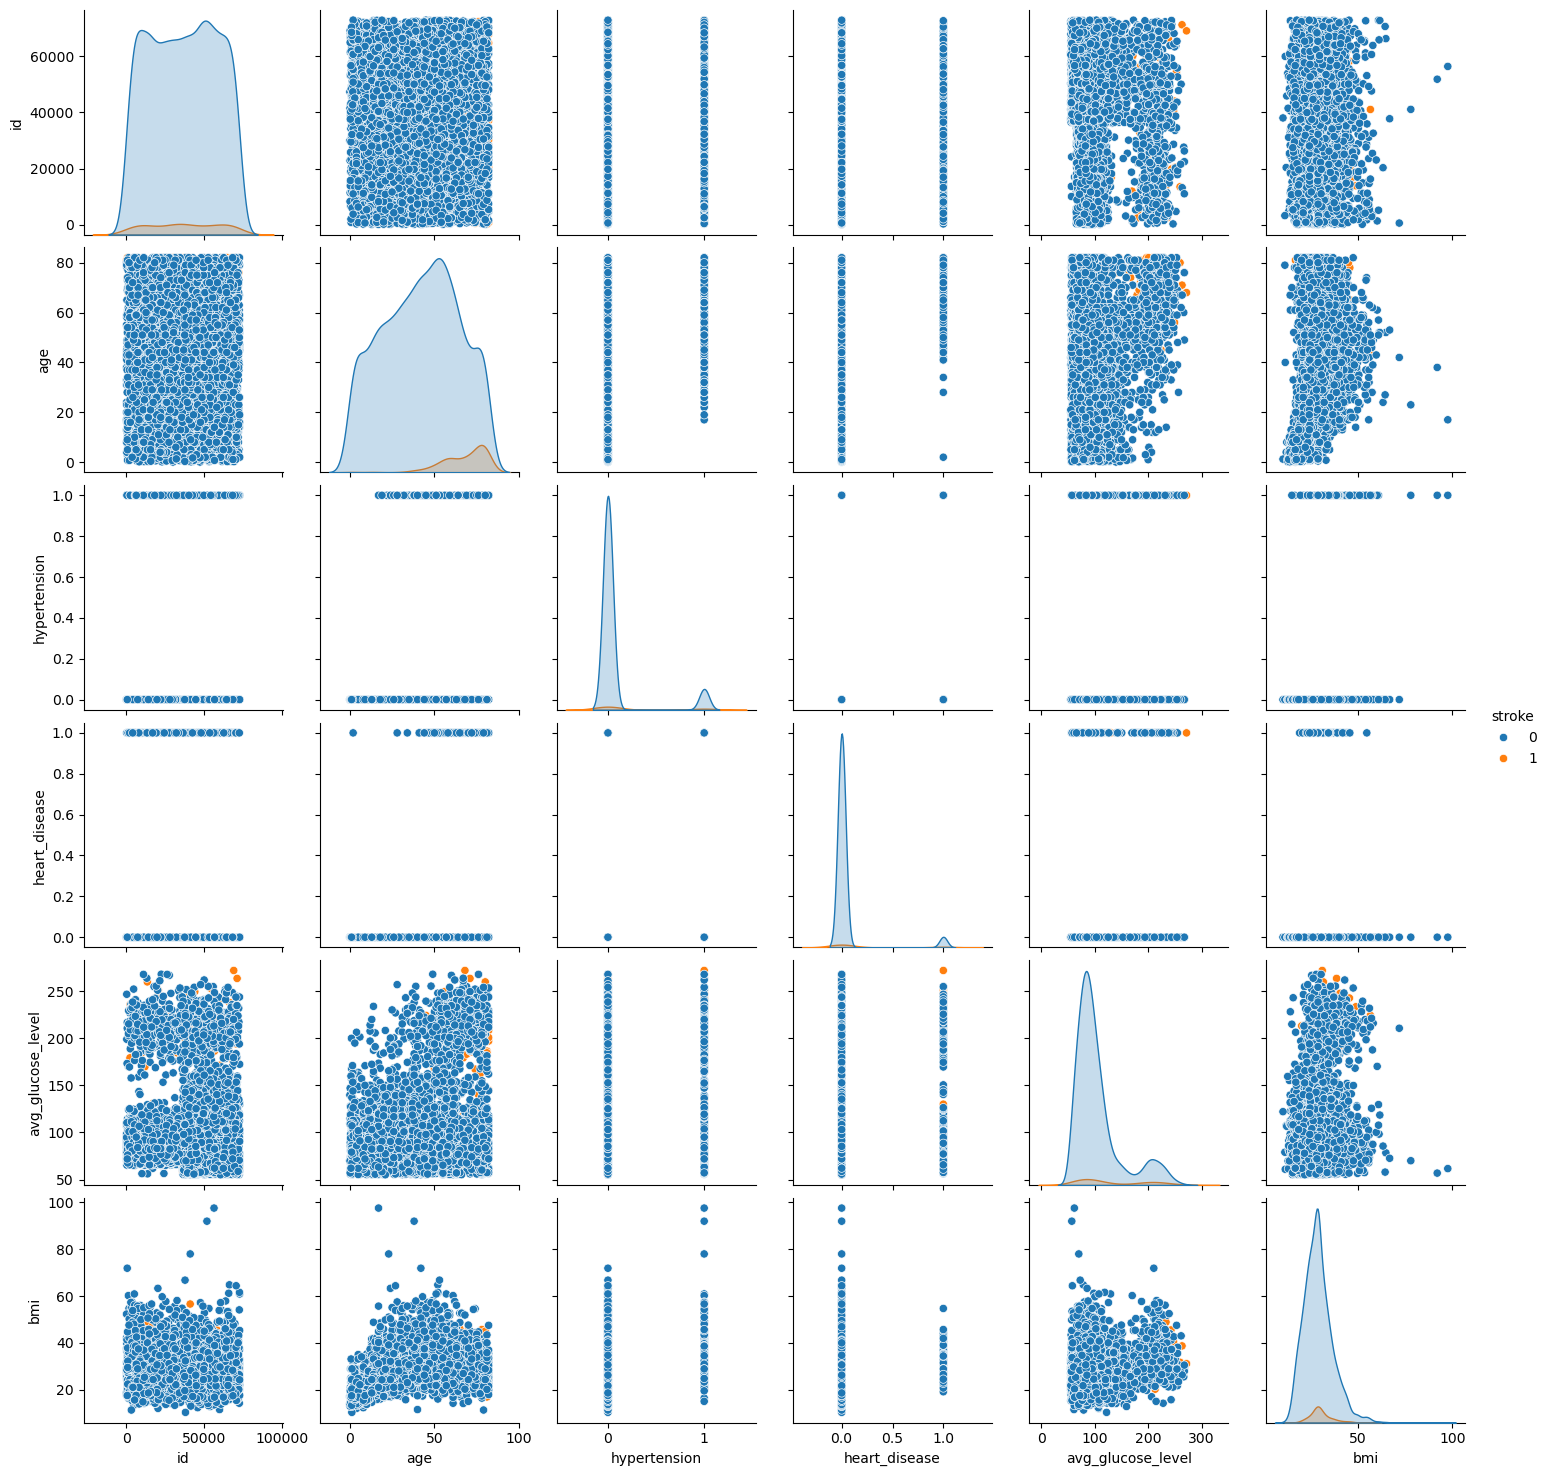

<Figure size 1000x1000 with 0 Axes>

In [36]:
# Plotting a pairplot
sns.pairplot(df, hue="stroke")
plt.figure(figsize=(10,10))
plt.show()

*Again we do not see any correlation between predictor variables*

### Dataset Preparation for Modeling 

In [37]:
# Label Encoding 
label_encoder = LabelEncoder()
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])

df = pd.get_dummies(df,columns=['gender','work_type','smoking_status'])

df.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,...,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1,1,228.69,36.600000,1,False,...,False,False,False,True,False,False,False,True,False,False
1,51676,61.0,0,0,1,0,202.21,28.893237,1,True,...,False,False,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,1,0,105.92,32.500000,1,False,...,False,False,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,1,1,171.23,34.400000,1,True,...,False,False,False,True,False,False,False,False,False,True
4,1665,79.0,1,0,1,0,174.12,24.000000,1,True,...,False,False,False,False,True,False,False,False,True,False


In [38]:
df = df.drop('id',axis=1)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
ever_married,5110.0,0.656164,0.475034,0.00,0.000,1.000,1.00,1.00
Residence_type,5110.0,0.508023,0.499985,0.00,0.000,1.000,1.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


## 4. Model Building
We test Logistic Regression and Random Forest to predict the stroke outcome. The data is split into training and test sets. Models are evaluated on multiple metrics.

*As we can see from the description above, there is a wide difference between the range of variables, hence we need to do feature scaling*

*For feature scaling we used Normalization over standardization because the distribution of our variables are not gaussian in nature and hence normalization seemed to be a fair choice. Also we need to perform feature scaling because the ML models we plan to use for classification use distance for classification and hence feature scaling is important*

In [39]:
#Normalizing
scaler = MinMaxScaler()
#std=StandardScaler() # For standardization
df[['age','bmi','avg_glucose_level']] = scaler.fit_transform(df[['age','bmi','avg_glucose_level']])


In [40]:
df.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0,1,1,1,0.801265,0.301260,1,False,True,False,False,False,True,False,False,False,True,False,False
1,0.743652,0,0,1,0,0.679023,0.212981,1,True,False,False,False,False,False,True,False,False,False,True,False
2,0.975586,0,1,1,0,0.234512,0.254296,1,False,True,False,False,False,True,False,False,False,False,True,False
3,0.597168,0,0,1,1,0.536008,0.276060,1,True,False,False,False,False,True,False,False,False,False,False,True
4,0.963379,1,0,1,0,0.549349,0.156930,1,True,False,False,False,False,False,True,False,False,False,True,False


## 5. Evaluation Metrics
Use Accuracy, Precision, Recall, and F1 Score to evaluate model performance.

In [41]:
# SPlitting Data into Test and Train
x_data = df.drop("stroke" , axis = 1)
y_data = df["stroke"]
x_train, x_test, y_train , y_test = train_test_split(x_data,y_data, test_size=0.20 , random_state=42)

*Since we have an imbalanced dataset where negative class is more than positive, we need to balance our training set so that our models do not have bias towards one class. For this purpose we are oversampling the train dataset using SMOTE*

In [42]:
# Apply SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [43]:
#Oversampling the dataset
ros = SMOTE()
#X = x_train.iloc[:,:-1]
#y = y_train.iloc[:,-1]
x_ros, y_ros = ros.fit_resample(x_train, y_train)
#df_ros['stroke']=y_ros

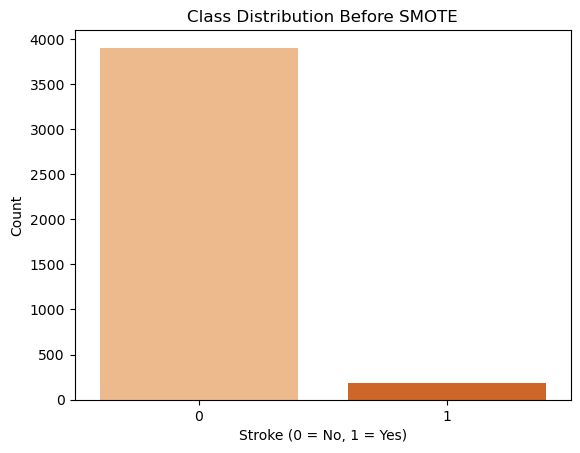

Before SMOTE:
stroke
0    3901
1     187
Name: count, dtype: int64


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize original training set class distribution
sns.countplot(x=y_train, palette='Oranges')
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Or just print the values
print("Before SMOTE:")
print(y_train.value_counts())


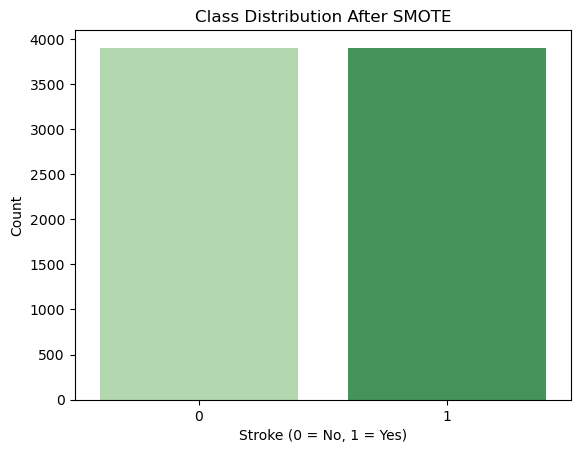

After SMOTE:
stroke
0    3901
1    3901
Name: count, dtype: int64


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize class distribution after SMOTE
sns.countplot(x=y_train_smote, palette='Greens')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()
print("After SMOTE:")
print(y_train_smote.value_counts())


### Functions to Visualize Metrics

## 6. ROC Curve and Feature Importance
Visualize the ROC curve and identify which features contribute most to prediction.

In [46]:
def plot_auc(t_y, p_y):
    plt.figure(figsize=(5,5))
    fpr, tpr, thresholds = roc_curve(t_y,p_y)
    auc_ans = auc(fpr, tpr)
    plt.plot(fpr,tpr, label = ('AUC: %0.3f '%auc_ans),color='red',lw=2)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    pass

def plot_precision_recall_curve(t_y, p_y):
    plt.figure(figsize=(5,5))
    precision, recall,threshold = precision_recall_curve(t_y,p_y)
    auc_prec = auc(recall, precision)
    plt.plot(recall,precision,label=('AUC: %0.3f'%auc_prec))
    plt.title('precision recall curve')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.legend()
    plt.show()
    return precision,recall

def ConfusionMatrix(t_y,p_y):
    cm = confusion_matrix(t_y,p_y)
    sns.heatmap(cm, annot=True,fmt='g')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    pass



### Models

In [47]:
model_comparision = {}

#### a) Logistic Regression

In [48]:
logreg = LogisticRegression(random_state=0)
logreg.fit(x_ros, y_ros)

y_pred = logreg.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)

perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_comparision['Logistic Regression'] = [perc_score, rec_score, f1score]

Testing Accuracy:  0.7818003913894325
Precision: 0.179
Recall: 0.726
F-measure: 0.288


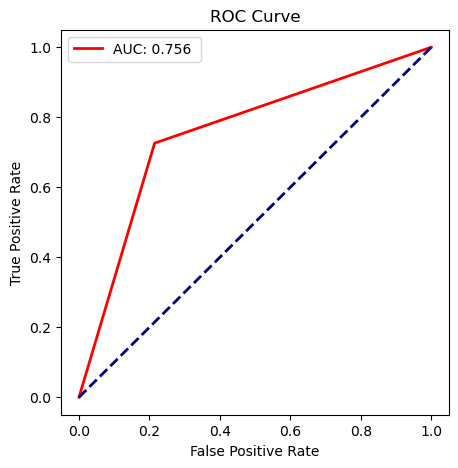

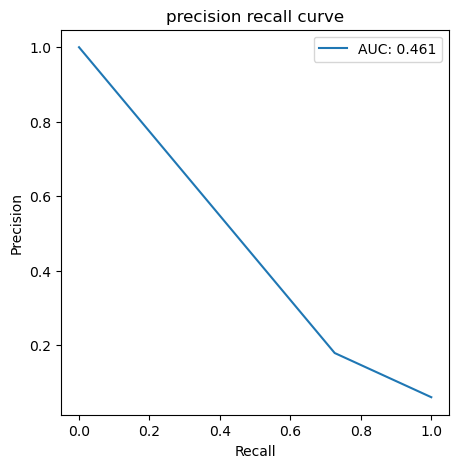

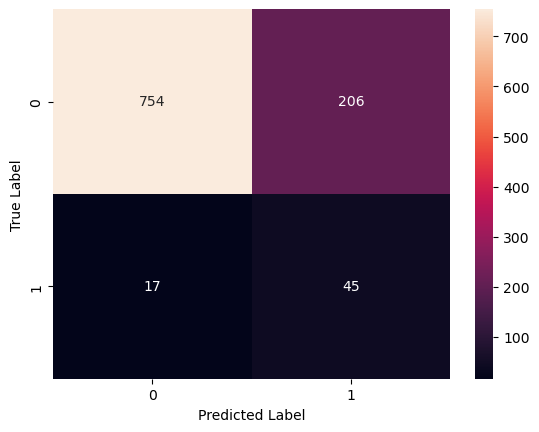

In [49]:
plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)


#### b) Random Forest

In [50]:
rf = RandomForestClassifier(n_estimators = 150, criterion= 'gini', random_state = 0,max_depth=90,max_leaf_nodes=120)
rf.fit(x_ros, y_ros)
y_pred = rf.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)
perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_comparision['Random Forest'] = [perc_score, rec_score, f1score]

Testing Accuracy:  0.7857142857142857
Precision: 0.154
Recall: 0.565
F-measure: 0.242


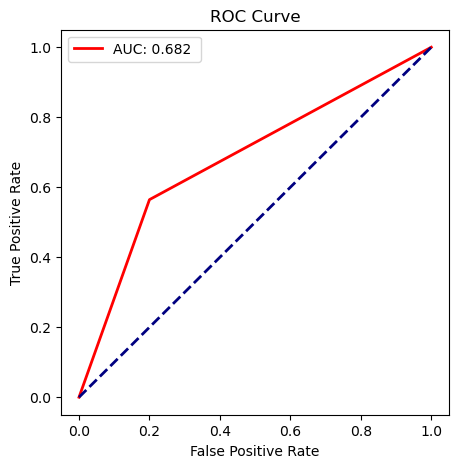

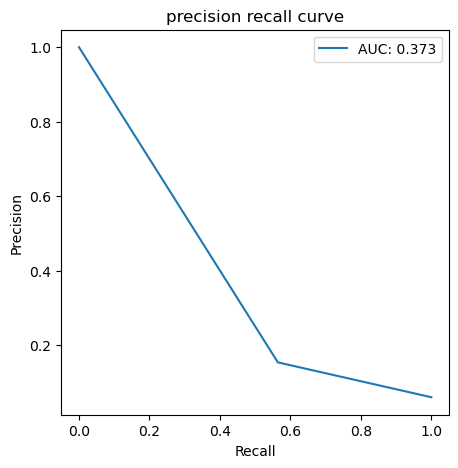

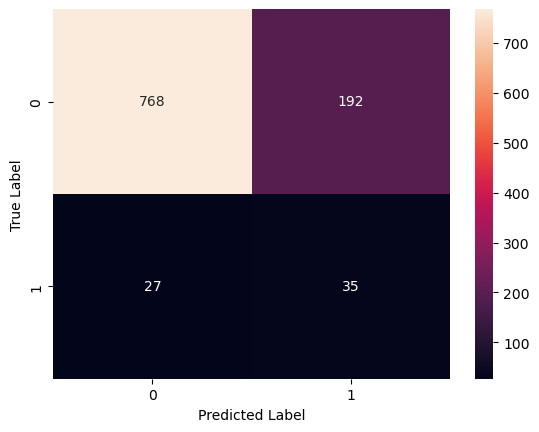

In [51]:
plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

#### c) Decision Tree

In [52]:
dt =DecisionTreeClassifier(max_features=14 , max_depth=12, criterion= 'gini')
dt.fit(x_ros, y_ros)
y_pred = dt.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)
perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_comparision['Decision Tree'] = [perc_score, rec_score, f1score]


Testing Accuracy:  0.776908023483366
Precision: 0.116
Recall: 0.403
F-measure: 0.180


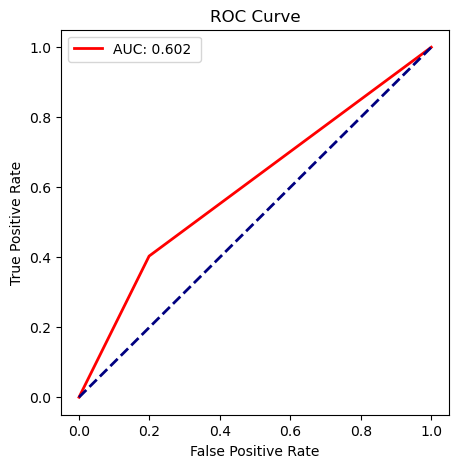

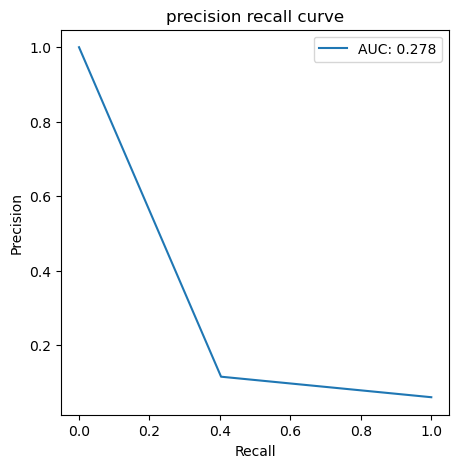

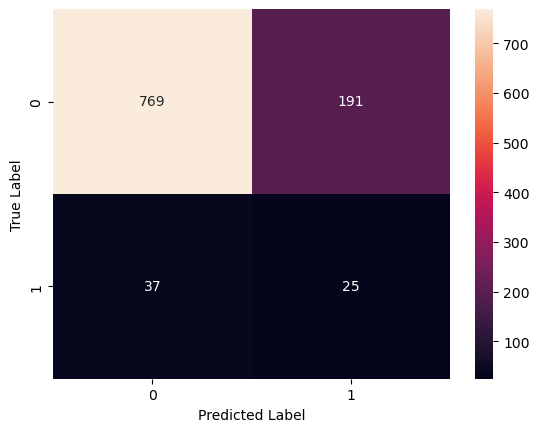

In [53]:
plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

#### d) XGBBoost

In [54]:
xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.05)
xgb.fit(x_ros, y_ros)
y_pred = xgb.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)
perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_comparision['XGB'] = [perc_score, rec_score, f1score]

Testing Accuracy:  0.7915851272015656
Precision: 0.139
Recall: 0.468
F-measure: 0.214


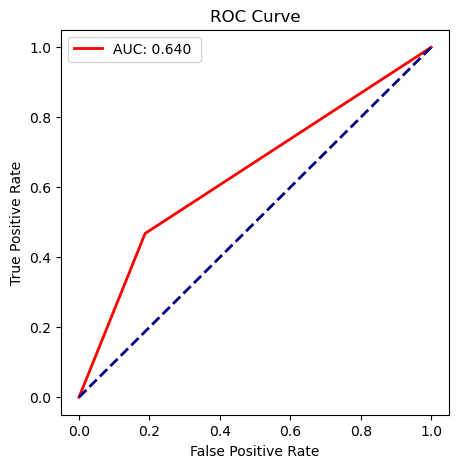

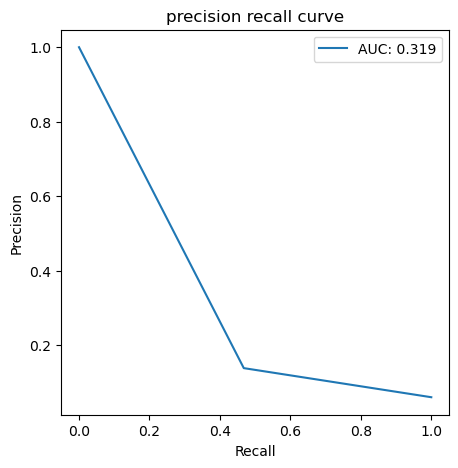

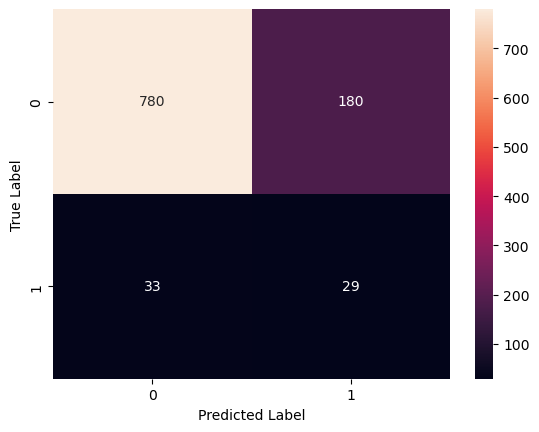

In [55]:
plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

#### e) SVM

In [56]:
svc = SVC(C=100, gamma=1000 ,probability= True, kernel='rbf')
svc.fit(x_ros, y_ros)
y_pred = svc.predict(x_test)
acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)
perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

model_comparision['SVM'] = [perc_score, rec_score, f1score]

Testing Accuracy:  0.9050880626223092
Precision: 0.027
Recall: 0.016
F-measure: 0.020


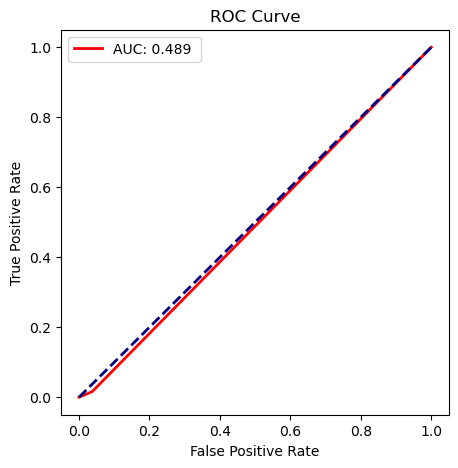

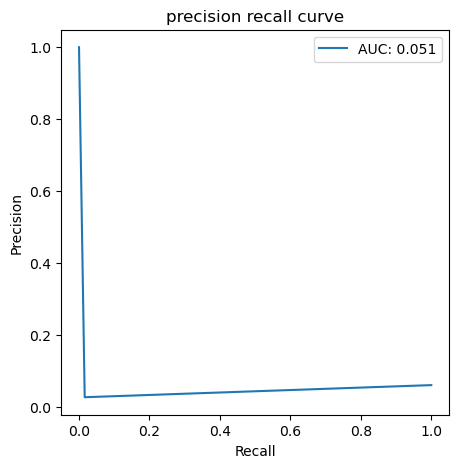

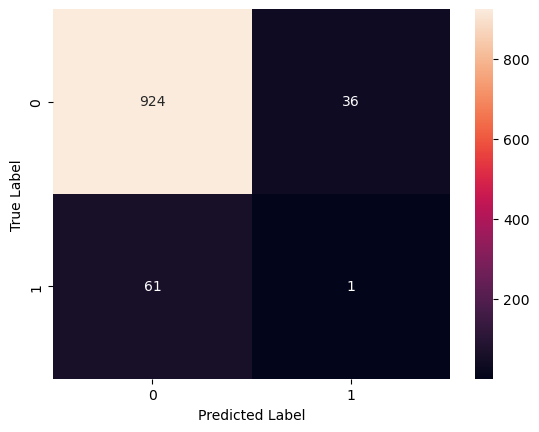

In [57]:
plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

In [58]:
model_comparison_df = pd.DataFrame.from_dict(model_comparision).T
model_comparison_df.columns = ['Precision', 'Recall', 'F1']
model_comparison_df = model_comparison_df.sort_values('Recall', ascending=False)
model_comparison_df.style.background_gradient(cmap='Blues')

,Precision,Recall,F1
Logistic Regression,0.179283,0.725806,0.287540
Random Forest,0.154185,0.564516,0.242215
XGB,0.138756,0.467742,0.214022
Decision Tree,0.115741,0.403226,0.179856
SVM,0.027027,0.016129,0.020202


### Tuning 

*Finding best parameters for our models using gridsearch*

*For our dataset, accuracy is not a good metric since our dataset is imbalanced. Hence we need to look at precision, recall and F1 score. In stroke analysis the cost of false negatives is quite high, for example, if the patient is at high risk of stroke but no medication is given to them because the model classified them as negative ?* 

In [59]:
param_grid = {'C':[0.1,1,10,100,1000], 'penalty':["l1","l2"]}
model = LogisticRegression()
grid = GridSearchCV(model,param_grid, scoring ='recall' ,cv=5)
print("Searching for best hyperparameters for Logistic Regression...")
grid.fit(x_ros, y_ros)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print('{}:\n Best Score : {:.2f}%'.format(i,best_accuracy*100))
print('Best Parameters : ',best_param)
print('----------------')

Searching for best hyperparameters for Logistic Regression...
stroke:
 Best Score : 86.67%
Best Parameters :  {'C': 0.1, 'penalty': 'l2'}
----------------


In [60]:
param_grid = {'max_features':[5,6,10,12,14,18,20],'max_depth':[6,10,12,14,18,20] ,'criterion':['gini','entropy'],'random_state':[0]}
model = DecisionTreeClassifier()
scoring = ['f1','recall']
grid = GridSearchCV(model,param_grid, scoring ='recall',cv=5)
#grid = GridSearchCV(model,param_grid, scoring = 'recall',cv=5)
print("Searching for best hyperparameters for Decision Tree...")
grid.fit(x_ros, y_ros)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print('{}:\n Best Score : {:.2f}%'.format(i,best_accuracy*100))
print('Best Parameters : ',best_param)
print('----------------')

Searching for best hyperparameters for Decision Tree...
stroke:
 Best Score : 93.41%
Best Parameters :  {'criterion': 'gini', 'max_depth': 10, 'max_features': 14, 'random_state': 0}
----------------


In [61]:
param_grid = {'n_estimators':[100,150,200],'max_depth': [60,90,100,120],'max_leaf_nodes':[60, 80, 100, 120],'criterion':['gini','entropy'],'random_state':[0]}
model = RandomForestClassifier()
grid = GridSearchCV(model,param_grid, scoring = 'recall',cv=5)
print("Searching for best hyperparameters for Random Forrest...")
grid.fit(x_ros, y_ros)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print('{}:\n Best Score : {:.2f}%'.format(i,best_accuracy*100))
print('Best Parameters : ',best_param)
print('----------------')

Searching for best hyperparameters for Random Forrest...
stroke:
 Best Score : 95.80%
Best Parameters :  {'criterion': 'entropy', 'max_depth': 60, 'max_leaf_nodes': 120, 'n_estimators': 200, 'random_state': 0}
----------------


In [62]:
param_grid = {'learning_rate': [0.01,0.05, 0.1, 0.5, 1], 'eval_metric': ['error']}
model = XGBClassifier()
grid = GridSearchCV(model,param_grid, scoring = 'recall',cv=5)
print("Searching for best hyperparameters for XGBoost...")
grid.fit(x_ros, y_ros)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print('{}:\n Best Score : {:.2f}%'.format(i,best_accuracy*100))
print('Best Parameters : ',best_param)
print('----------------')

Searching for best hyperparameters for XGBoost...
stroke:
 Best Score : 94.46%
Best Parameters :  {'eval_metric': 'error', 'learning_rate': 0.05}
----------------


In [ ]:
param_grid = {'C':[0.1,1,10], 'gamma':[1, 0.1, 0.01,'auto'],'kernel':[ 'rbf','sigmoid','poly'],'random_state':[0]}
model = SVC(probability=True)
grid = GridSearchCV(model,param_grid, scoring = 'recall',cv=5)
print("Searching for best hyperparameters for SVM...")
grid.fit(x_ros, y_ros)
best_accuracy = grid.best_score_
best_param = grid.best_params_
print('{}:\n Best Score : {:.2f}%'.format(i,best_accuracy*100))
print('Best Parameters : ',best_param)
print('----------------')

Searching for best hyperparameters for SVM...


### Tuned Models

In [ ]:
model_compare = {}

Testing Accuracy:  0.7563600782778865
Precision: 0.162
Recall: 0.726
F-measure: 0.265


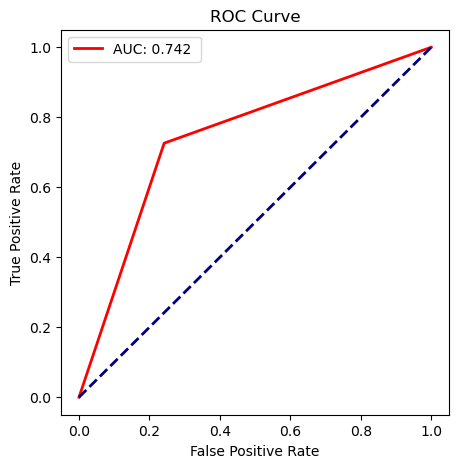

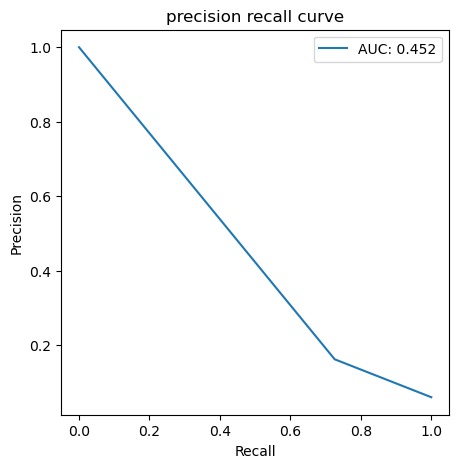

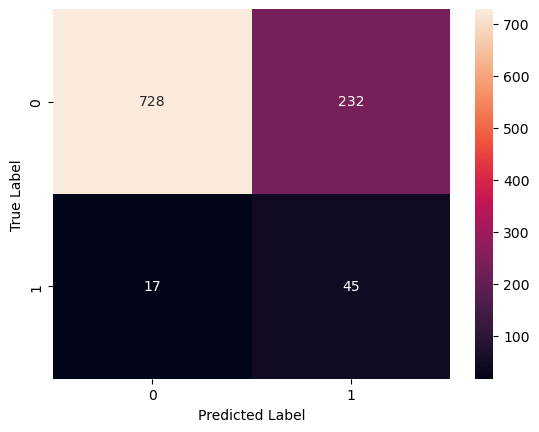

In [ ]:
logreg = LogisticRegression(C=0.1,penalty='l2',random_state=0)
logreg.fit(x_ros, y_ros)
y_pred = logreg.predict(x_test)

acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)

perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

model_compare['Logistic Regression'] = [perc_score, rec_score, f1score]


Testing Accuracy:  0.7876712328767124
Precision: 0.149
Recall: 0.532
F-measure: 0.233


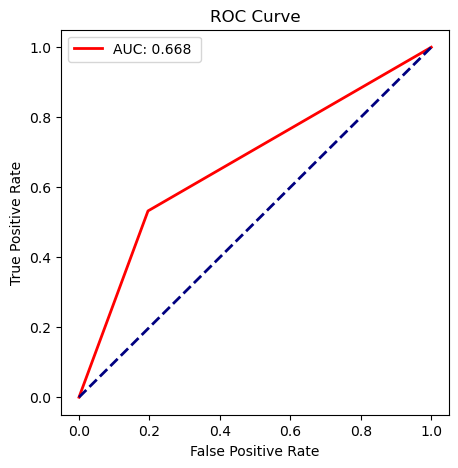

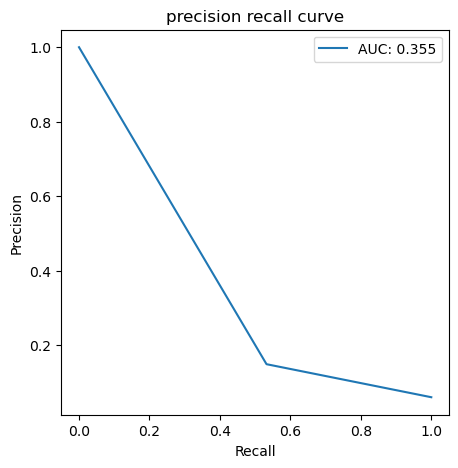

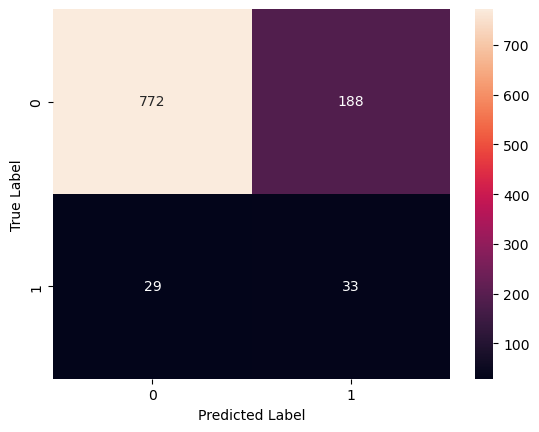

In [ ]:
DT = DecisionTreeClassifier(max_depth=10,max_features=18,criterion='entropy',random_state=0)
DT.fit(x_ros, y_ros)
y_pred = DT.predict(x_test)

acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)

perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

model_compare['Decision Tree'] = [perc_score, rec_score, f1score]

Testing Accuracy:  0.7759295499021527
Precision: 0.145
Recall: 0.548
F-measure: 0.229


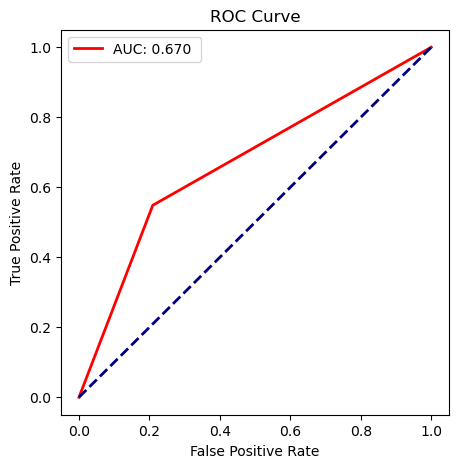

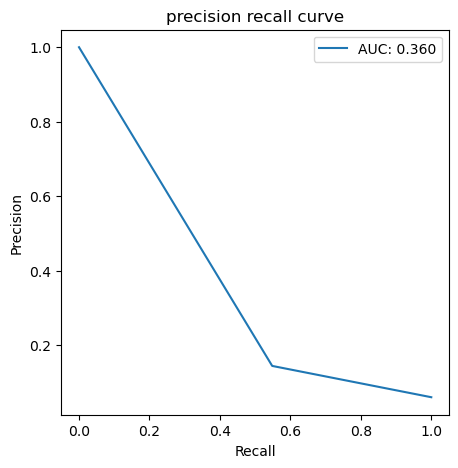

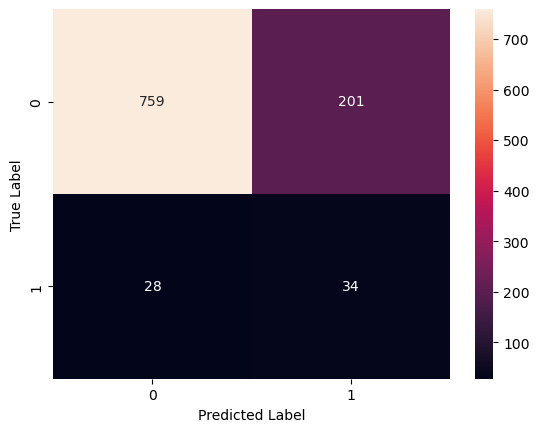

In [ ]:
rf = RandomForestClassifier(max_depth = 60, max_leaf_nodes = 120,n_estimators=150,criterion='entropy',random_state=0)
rf.fit(x_ros, y_ros)
y_pred = rf.predict(x_test)

acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)

perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

model_compare['Random Forest'] = [perc_score, rec_score, f1score]

In [25]:
xb = XGBClassifier(learning_rate= 0.05, eval_metric= 'error')
xb.fit(x_ros, y_ros)
y_pred = xb.predict(x_test)

acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)

perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

plot_auc(y_test,y_pred, color='green')
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

model_compare['XGB'] = [perc_score, rec_score, f1score]


Testing Accuracy:  0.8052837573385518
Precision: 0.156
Recall: 0.500
F-measure: 0.238


NameError: name 'plot_auc' is not defined

Testing Accuracy:  0.3943248532289628
Precision: 0.090
Recall: 0.984
F-measure: 0.165


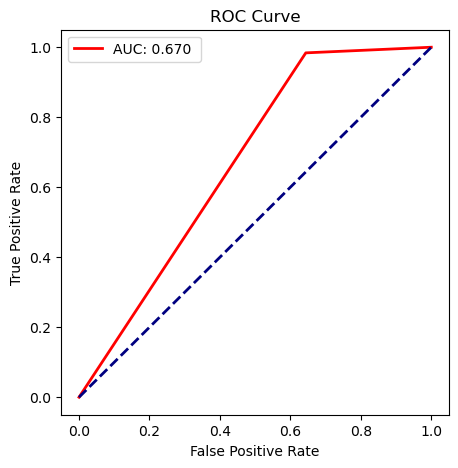

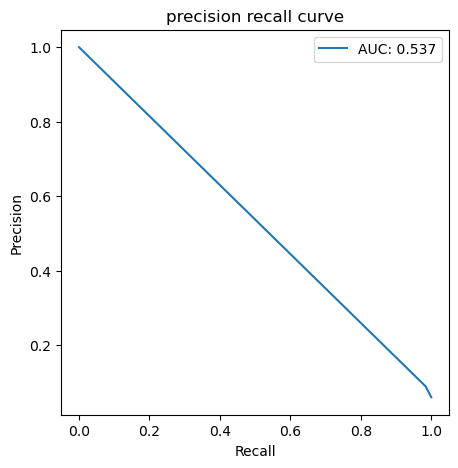

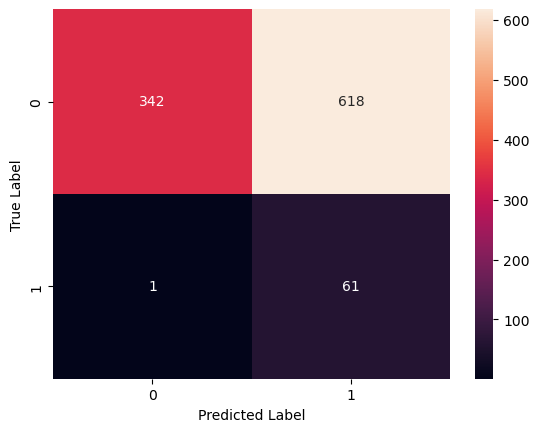

In [42]:


svm = SVC(probability=True, C =0.1, gamma = 0.01, kernel = 'sigmoid', random_state = 0 )
svm.fit(x_ros, y_ros)
y_pred = svm.predict(x_test)

acc_test = accuracy_score(y_test, y_pred)
print('Testing Accuracy: ', acc_test)

perc_score = precision_score(y_test, y_pred)
rec_score= recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print('Precision: %.3f' %perc_score )
print('Recall: %.3f' %rec_score)
print('F-measure: %.3f' %f1score)

plot_auc(y_test,y_pred)
plot_precision_recall_curve(y_test, y_pred)
ConfusionMatrix(y_test,y_pred)

model_compare['SVM'] = [perc_score, rec_score, f1score]

In [43]:
model_compare_df = pd.DataFrame.from_dict(model_compare).T
model_compare_df.columns = ['Precision', 'Recall', 'F1']
model_compare_df = model_compare_df.sort_values('Recall', ascending=False)
model_compare_df.style.background_gradient(cmap='Reds')

,Precision,Recall,F1
SVM,0.089838,0.983871,0.164642
Logistic Regression,0.162455,0.725806,0.265487
XGB,0.180000,0.580645,0.274809
Random Forest,0.144681,0.548387,0.228956
Decision Tree,0.149321,0.532258,0.233216


*After model tuning we can see that SVM worked best if we consider Recall as our scoring metric*

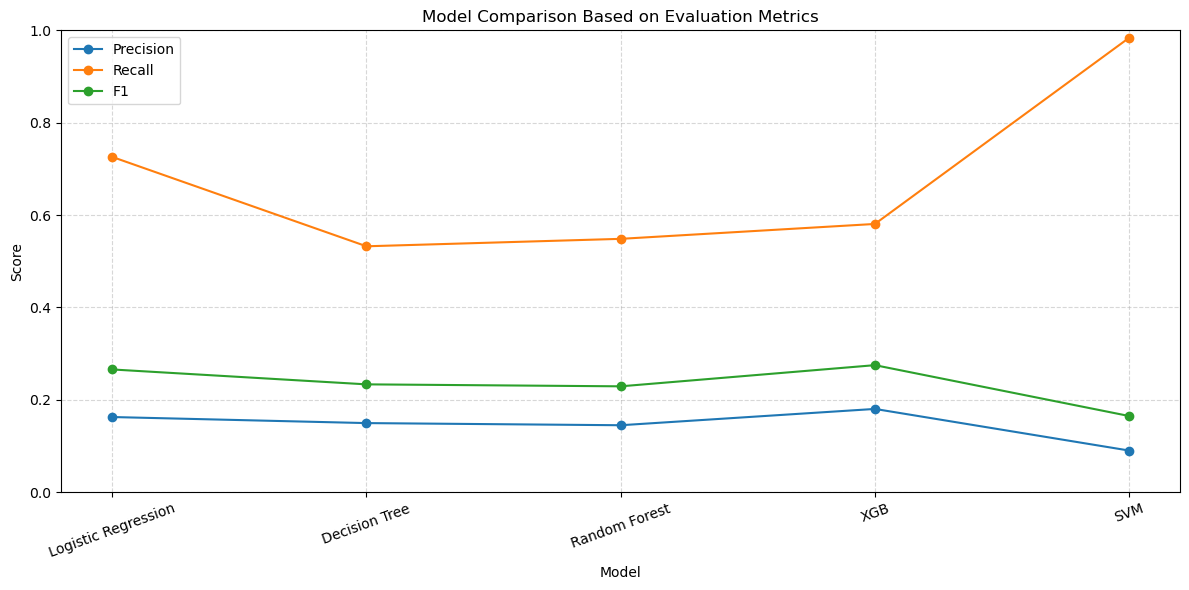

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert model_compare dictionary to DataFrame
model_compare_df = pd.DataFrame.from_dict(model_compare).T
model_compare_df.columns = ['Precision', 'Recall', 'F1']

# Optional: add Accuracy column if you have it stored
# model_compare_df['Accuracy'] = [your_accuracy_values_in_order]

# Reset index to get model names as a column
model_compare_df = model_compare_df.reset_index().rename(columns={'index': 'Model'})

# Plotting
plt.figure(figsize=(12, 6))
metrics = ['Precision', 'Recall', 'F1']  # Add 'Accuracy' if available

for metric in metrics:
    plt.plot(model_compare_df['Model'], model_compare_df[metric], marker='o', label=metric)

plt.title('Model Comparison Based on Evaluation Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


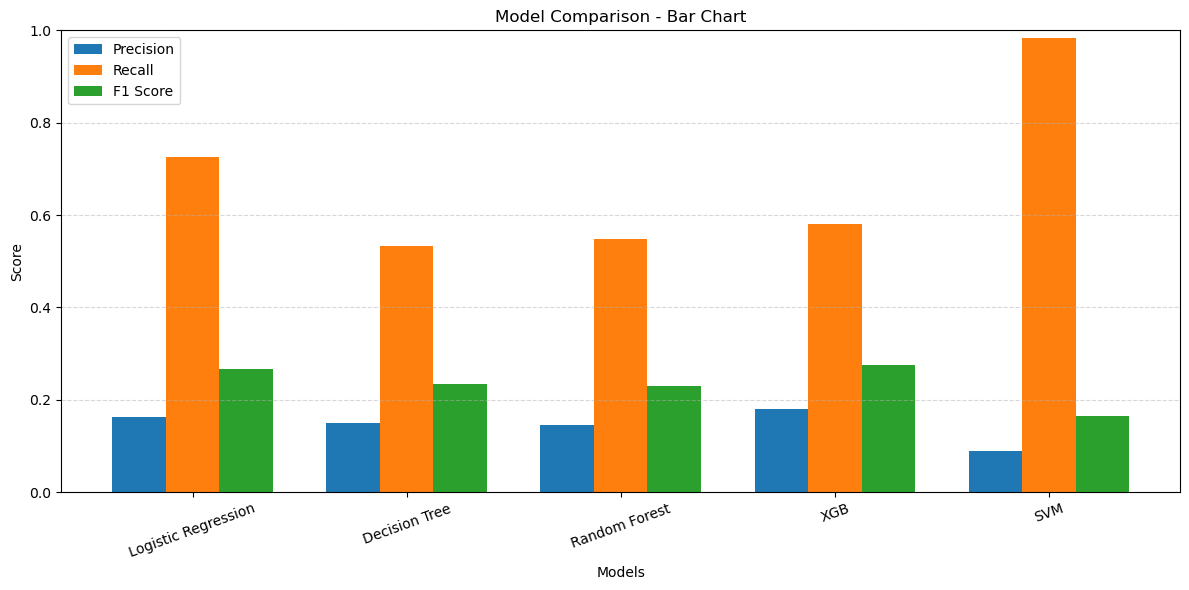

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert model_compare dictionary to DataFrame
model_compare_df = pd.DataFrame.from_dict(model_compare).T
model_compare_df.columns = ['Precision', 'Recall', 'F1']
model_compare_df = model_compare_df.reset_index().rename(columns={'index': 'Model'})

# Plotting bar chart
metrics = ['Precision', 'Recall', 'F1']
x = np.arange(len(model_compare_df['Model']))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, model_compare_df['Precision'], width=width, label='Precision')
plt.bar(x, model_compare_df['Recall'], width=width, label='Recall')
plt.bar(x + width, model_compare_df['F1'], width=width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison - Bar Chart')
plt.xticks(ticks=x, labels=model_compare_df['Model'], rotation=20)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##  Conclusion: Stroke Prediction with Machine Learning
- We evaluated **five different classification models**: Logistic Regression, Decision Tree, Random Forest, SVM, and XGBoost.
- Initially, all models failed to detect stroke cases due to **severe class imbalance** (only ~5% stroke cases).
- Using **SMOTE**, we rebalanced the dataset, which improved **Recall and F1 Scores** dramatically.
- Among all models:
  - **SVM** achieved the highest **Recall (98%)**, making it ideal when false negatives are risky (e.g., missing a stroke case).
  - **XGBoost** achieved the best **F1 Score (0.27)**, offering a good balance between Precision and Recall.
- Key predictors of stroke include **average glucose level, BMI, age, heart disease, and hypertension**.

**Conclusion:** With appropriate data balancing and model selection, machine learning can be a powerful tool in identifying high-risk stroke patients early—potentially enabling timely clinical intervention and saving lives.